<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [3]:
#select the data and explore the shape
df_age_vs_jobsat = df[['Age','JobSatPoints_6','ResponseId']]
df_age_vs_jobsat.shape

(65437, 3)

In [4]:
#check for unique entry for Age
df_age_vs_jobsat['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [5]:
#check for unique entry for JobSatPoints_6
df_age_vs_jobsat['JobSatPoints_6'].unique()

array([   nan,   0.  ,  25.  ,  30.  ,  60.  , 100.  ,  20.  ,  50.  ,
        15.  ,  10.  ,   5.  ,  80.  ,   8.  ,  65.  ,  90.  ,  75.  ,
        35.  ,  40.  ,  33.  ,  70.  ,  17.  ,   7.  ,  12.  ,  13.  ,
         9.  ,  21.  ,  18.  ,  95.  ,   2.  ,  45.  ,  34.  ,  16.  ,
        78.  ,  85.  ,   1.  ,  14.  ,  31.  ,  11.  ,  23.  ,  28.  ,
        81.  ,   6.25,   6.  ,  55.  ,   3.  ,  22.  ,  42.  ,   4.  ,
        89.  ,  99.  ,  12.5 ,  36.  ,  27.  ,  24.  ,  19.  ,  87.  ,
        88.  ,  29.  ,  33.33,  33.3 ,  37.  ,  39.  ,  77.  ,  68.  ,
        26.  ,  98.  ,  32.  ,  66.  ,  57.  ,  82.  ,  94.  ,  61.  ,
        43.  ,  69.  ,  76.  ,  73.  ,  17.5 ,  46.  ,  49.  ,  52.  ,
        97.  ,  96.  ,  67.  ,  91.  ,  86.  ,  56.  ,  41.  ,  74.  ,
        51.  ,  48.  ,  44.  ,  64.  ,  54.  ,  63.  ])

In [6]:
#check descriptive stats for JobSatPoints_6
df_age_vs_jobsat['JobSatPoints_6'].describe()

count    29450.000000
mean        24.343232
std         27.089360
min          0.000000
25%          0.000000
50%         20.000000
75%         30.000000
max        100.000000
Name: JobSatPoints_6, dtype: float64

In [7]:
#Remove NaN 
df_age_vs_jobsat_filtered = df_age_vs_jobsat.dropna(subset='JobSatPoints_6')

In [8]:
#check for NaN removal
(df_age_vs_jobsat_filtered.isnull().sum())

Age               0
JobSatPoints_6    0
ResponseId        0
dtype: int64

In [11]:
df_age_vs_jobsat_filtered.head()

,Age,JobSatPoints_6,ResponseId
1,35-44 years old,0.0,2
10,35-44 years old,25.0,11
12,35-44 years old,30.0,13
15,45-54 years old,0.0,16
18,25-34 years old,60.0,19


In [12]:
#Order Age
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']

# Apply order
df_age_vs_jobsat_filtered['Age'] = pd.Categorical(df_age_vs_jobsat_filtered['Age'], categories=age_order, ordered=True)

# Sort the df
df_sorted = df_age_vs_jobsat_filtered.sort_values(by='Age')

/tmp/ipykernel_1713/3962540295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_vs_jobsat_filtered['Age'] = pd.Categorical(df_age_vs_jobsat_filtered['Age'], categories=age_order, ordered=True)


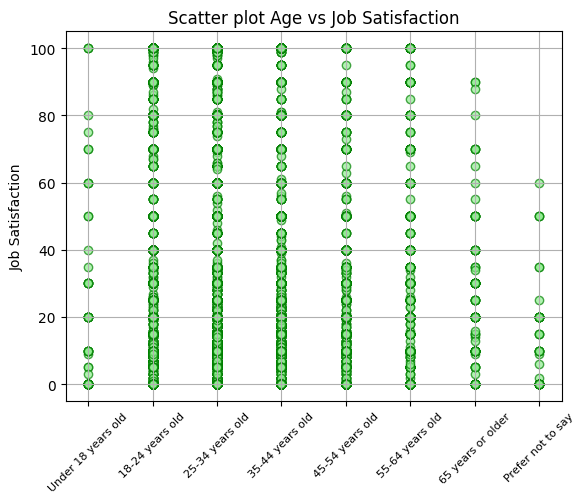

In [13]:
#plot the scatter plot
plt.scatter(df_sorted['Age'],df_sorted['JobSatPoints_6'], alpha=0.7, color='lightgreen', edgecolor='green') 
plt.title('Scatter plot Age vs Job Satisfaction') 
plt.ylabel('Job Satisfaction')
plt.xticks(fontsize=8, rotation=45)
plt.grid()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [14]:
#select data
df_comp_vs_jobsat = df[['ConvertedCompYearly','JobSatPoints_6','ResponseId']]

In [15]:
#check for NaN
(df_comp_vs_jobsat.isnull().sum())

ConvertedCompYearly    42002
JobSatPoints_6         35987
ResponseId                 0
dtype: int64

In [16]:
#check the descriptive stats
df_comp_vs_jobsat['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [17]:
#Remove NaN
df_comp_vs_jobsat_filtered = df_comp_vs_jobsat.dropna(subset=['JobSatPoints_6','ConvertedCompYearly'])

In [18]:
#check for removal
(df_comp_vs_jobsat_filtered.isnull().sum())

ConvertedCompYearly    0
JobSatPoints_6         0
ResponseId             0
dtype: int64

In [19]:
#verigy the shape
df_comp_vs_jobsat_filtered.shape

(16185, 3)

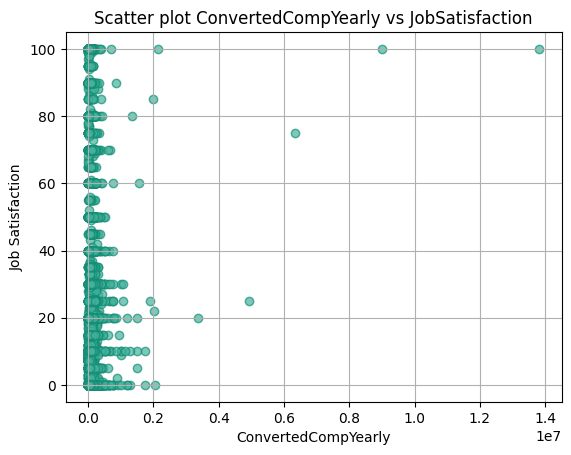

In [29]:
#plot with outliers
plt.scatter(df_comp_vs_jobsat_filtered['ConvertedCompYearly'],
            df_comp_vs_jobsat_filtered['JobSatPoints_6'],alpha=0.7, color='#45b39d',edgecolor='#138d75') 
plt.title('Scatter plot ConvertedCompYearly vs JobSatisfaction') 
plt.ylabel('Job Satisfaction')
plt.xlabel('ConvertedCompYearly')
plt.grid()
plt.show()

In [23]:
#set limit outlier for ConvertedCompYearly
Q1 = df_comp_vs_jobsat['ConvertedCompYearly'].quantile(0.25)
Q3 = df_comp_vs_jobsat['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1 
higher_outlier = Q3 + 1.5*IQR 
higher_outlier

np.float64(220860.75)

In [24]:
#filter data to remove outlier
data_df = df_comp_vs_jobsat_filtered[df_comp_vs_jobsat_filtered['ConvertedCompYearly']<higher_outlier]

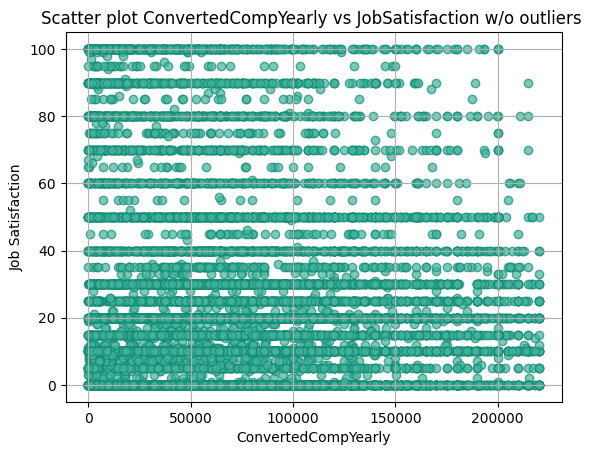

In [26]:
#scatter plot w/o outliers
plt.scatter(data_df['ConvertedCompYearly'],
            data_df['JobSatPoints_6'], alpha=0.7, color='#45b39d',edgecolor='#138d75') 
plt.title('Scatter plot ConvertedCompYearly vs JobSatisfaction w/o outliers ') 
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction')
plt.grid()
plt.show()

In [30]:
#Log scale for convertedCompYearly
import numpy as np
data_df['ConvertedCompYearly_log'] = np.log(data_df['ConvertedCompYearly'] + 1)  # +1 to escape log(0)

/tmp/ipykernel_1713/3627339145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['ConvertedCompYearly_log'] = np.log(data_df['ConvertedCompYearly'] + 1)  # +1 to escape log(0)


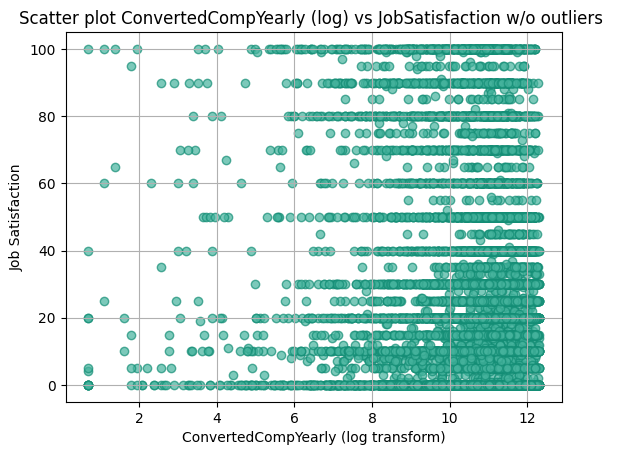

In [31]:
#scatter plot w/o outlier and log scale
plt.scatter(data_df['ConvertedCompYearly_log'],
            data_df['JobSatPoints_6'], alpha=0.7, color='#45b39d',edgecolor='#138d75') 
plt.title('Scatter plot ConvertedCompYearly (log) vs JobSatisfaction w/o outliers ') 
plt.xlabel('ConvertedCompYearly (log transform)')
plt.ylabel('Job Satisfaction')
plt.grid()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [60]:
df_scatter_trend = df[['Age','JobSatPoints_6']]

In [61]:
#change Age as numerical data
import numpy as np
def age_quantitative (age):
    if age =='Prefer not to say':
        return np.nan
    if age =='Under 18 years old' :
        return 17
    elif age =='35-44 years old':
        return (35+44)/2
    elif age =='45-54 years old':
        return (45+54)/2
    elif age =='18-24 years old':
        return (18+24)/2 
    elif age =='25-34 years old': 
        return (25+34)/2
    elif age =='55-64 years old': 
        return (55+64)/2 
    elif age =='65 years or older':  
        return 66

In [62]:
#Apply the function
df_scatter_trend['Age'] = df_scatter_trend['Age'].apply(age_quantitative)

/tmp/ipykernel_1713/4277811945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scatter_trend['Age'] = df_scatter_trend['Age'].apply(age_quantitative)


In [64]:
df_scatter_trend.head()

,Age,JobSatPoints_6
0,17.0,NaN
1,39.5,0.0
2,49.5,NaN
3,21.0,NaN
4,21.0,NaN


In [65]:
#check for missing values
(df_scatter_trend.isnull().sum())

Age                 322
JobSatPoints_6    35987
dtype: int64

In [70]:
#remove NaN
df_scatter_trend.dropna(subset=['Age','JobSatPoints_6'],inplace=True)

/tmp/ipykernel_1713/1611846149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scatter_trend.dropna(subset=['Age','JobSatPoints_6'],inplace=True)


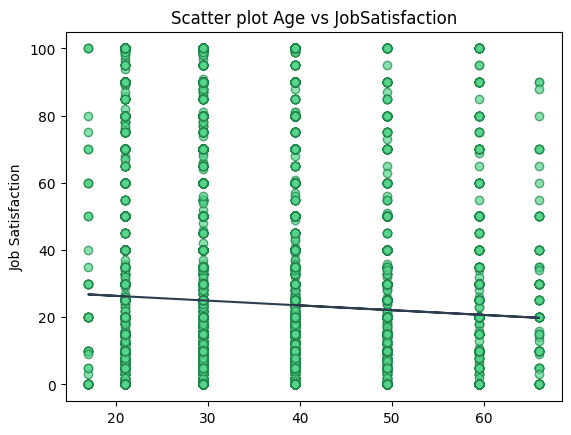

In [72]:
#plot the scatter plot with a linear regression trend line
x=df_scatter_trend['Age']
y=df_scatter_trend['JobSatPoints_6']
# Calculate the parameter for the regression line
coeffs = np.polyfit(x, y, deg=1)  # linear regression degree 1
tendance = np.poly1d(coeffs)  # Generate linear regression
# Scatter plot
plt.scatter(x, y, alpha=0.7, edgecolor='#1d8348', color='#58d68d')
# plot the linear curve
plt.plot(x, tendance(x), color='#2c3e50', label='Tendance')
plt.title('Scatter plot Age vs JobSatisfaction') 
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [36]:
df_age_vs_workexp = df[['Age','WorkExp','ResponseId']]

In [38]:
#change Age as numerical data
import numpy as np
def age_quantitative (age):
    if age =='Prefer not to say':
        return np.nan
    if age =='Under 18 years old' :
        return 17
    elif age =='35-44 years old':
        return (35+44)/2
    elif age =='45-54 years old':
        return (45+54)/2
    elif age =='18-24 years old':
        return (18+24)/2 
    elif age =='25-34 years old': 
        return (25+34)/2
    elif age =='55-64 years old': 
        return (55+64)/2 
    elif age =='65 years or older':  
        return 66

In [39]:
#Apply the function
df_age_vs_workexp['Age'] = df_age_vs_workexp['Age'].apply(age_quantitative)

/tmp/ipykernel_1713/3514418116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_vs_workexp['Age'] = df_age_vs_workexp['Age'].apply(age_quantitative)


In [40]:
#check for unique entry
df_age_vs_workexp['Age'].unique()

array([17. , 39.5, 49.5, 21. , 29.5, 59.5,  nan, 66. ])

In [53]:
df_age_vs_workexp['WorkExp'].unique()

array([nan, 17., 15., 12., 29., 10., 18., 16.,  6.,  7., 14.,  3.,  4.,
        8.,  1.,  9., 27., 31., 35., 25.,  5., 28., 26., 13., 30., 37.,
        2., 24., 20., 23., 19., 21., 11., 34., 32., 22.,  0., 33., 44.,
       40., 41., 36., 45., 39., 50., 38., 48., 42., 46., 43., 49., 47.])

In [42]:
#remove NaN
df_age_vs_workexp_filtered = df_age_vs_workexp.dropna(subset=['Age','WorkExp'])

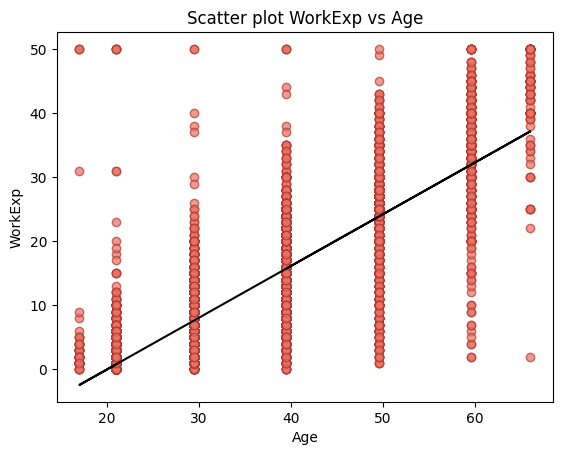

In [44]:
#plot scatter plot
# Calculate the parameter for the linear trend
x=df_age_vs_workexp_filtered['Age'] 
y=df_age_vs_workexp_filtered['WorkExp']
coeffs = np.polyfit(x, y, deg=1)  # Linear regression degree 1
tendance = np.poly1d(coeffs)  # generate the linear regression
#plot scatter plot
plt.scatter(df_age_vs_workexp_filtered['Age'],
            df_age_vs_workexp_filtered['WorkExp'],
            alpha=0.7, color='#ec7063',edgecolor='#b03a2e') 
#plot tendance
plt.plot(x, tendance(x), color='black', label='Tendance')
plt.title('Scatter plot WorkExp vs Age') 
plt.xlabel('Age')
plt.ylabel('WorkExp')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [73]:
#select data
df_bubble = df[['ConvertedCompYearly','JobSatPoints_6','Age','ResponseId']]

1/convert Age for a quantitative variable

2/log transform ConvertedCompYearly, exclude outliers

3/filter for NaN

4/plot

In [74]:
#modify Age
df_bubble['Age'] = df_bubble['Age'].apply(age_quantitative)

/tmp/ipykernel_1713/2735669258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble['Age'] = df_bubble['Age'].apply(age_quantitative)


In [62]:
(df_bubble.isnull().sum())

ConvertedCompYearly    42002
JobSatPoints_6         35987
Age                      322
ResponseId                 0
dtype: int64

In [75]:
#remove NaN
df_bubble = df_bubble.dropna(subset=['ConvertedCompYearly','JobSatPoints_6','Age'])

In [76]:
(df_bubble.isnull().sum())

ConvertedCompYearly    0
JobSatPoints_6         0
Age                    0
ResponseId             0
dtype: int64

In [77]:
#filter ConvertedCompYearly for outliers
df_bubble_filtered = df_bubble[df_bubble['ConvertedCompYearly']<higher_outlier]

In [78]:
#Log transform convertedCompYearly
df_bubble_filtered['ConvertedCompYearly_log'] = np.log(df_bubble_filtered['ConvertedCompYearly'] + 1)  # +1 pour éviter log(0)

/tmp/ipykernel_1713/2665277477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble_filtered['ConvertedCompYearly_log'] = np.log(df_bubble_filtered['ConvertedCompYearly'] + 1)  # +1 pour éviter log(0)


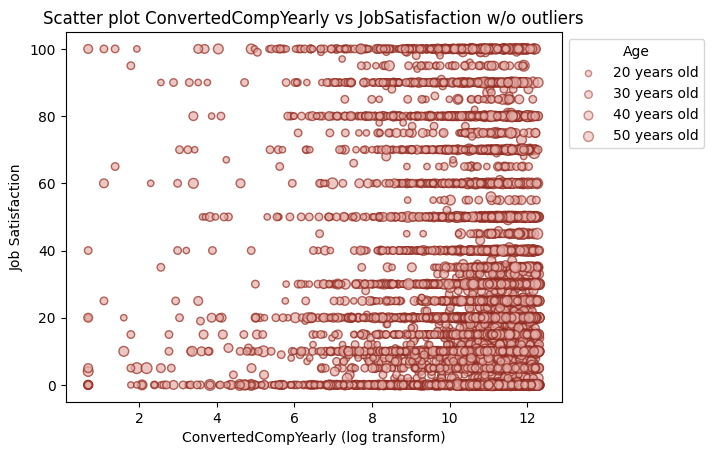

In [81]:
# Scatter plot
plt.scatter(df_bubble_filtered['ConvertedCompYearly_log'],
            df_bubble_filtered['JobSatPoints_6'], 
            s=df_bubble_filtered['Age'], alpha=0.7,edgecolor='#922b21', color='#e6b0aa')

plt.title('Scatter plot ConvertedCompYearly vs JobSatisfaction w/o outliers')
plt.xlabel('ConvertedCompYearly (log transform)')
plt.ylabel('Job Satisfaction')

# Legend for bubble size
size_labels = [20, 30, 40, 50] 
handles = [plt.scatter([], [], s=size, color='#e6b0aa', alpha=0.5, edgecolor='#922b21') for size in size_labels]
labels = ['20 years old', '30 years old', '40 years old','50 years old']  
plt.legend(handles, labels, title="Age", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [82]:
#select data
df_language = df[['LanguageHaveWorkedWith','JobSatPoints_6','ResponseId']]

In [83]:
#Split LanguageHaveWorkedWith into list
df_language['LanguageHaveWorkedWith'] = df_language['LanguageHaveWorkedWith'].str.split(';')
df_language_exploded = df_language.explode('LanguageHaveWorkedWith')

/tmp/ipykernel_1713/3287051853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_language['LanguageHaveWorkedWith'] = df_language['LanguageHaveWorkedWith'].str.split(';')


In [84]:
#check the header of LanguageHaveWorkedWith exploded
df_language_exploded['LanguageHaveWorkedWith'].head()

0                        NaN
1    Bash/Shell (all shells)
1                         Go
1                   HTML/CSS
1                       Java
Name: LanguageHaveWorkedWith, dtype: object

In [85]:
(df_language_exploded.isnull().sum())

LanguageHaveWorkedWith      5692
JobSatPoints_6            169215
ResponseId                     0
dtype: int64

In [86]:
#remove NaN
df_language_exploded = df_language_exploded.dropna(subset=['LanguageHaveWorkedWith','JobSatPoints_6'])

In [87]:
(df_language_exploded.isnull().sum())

LanguageHaveWorkedWith    0
JobSatPoints_6            0
ResponseId                0
dtype: int64

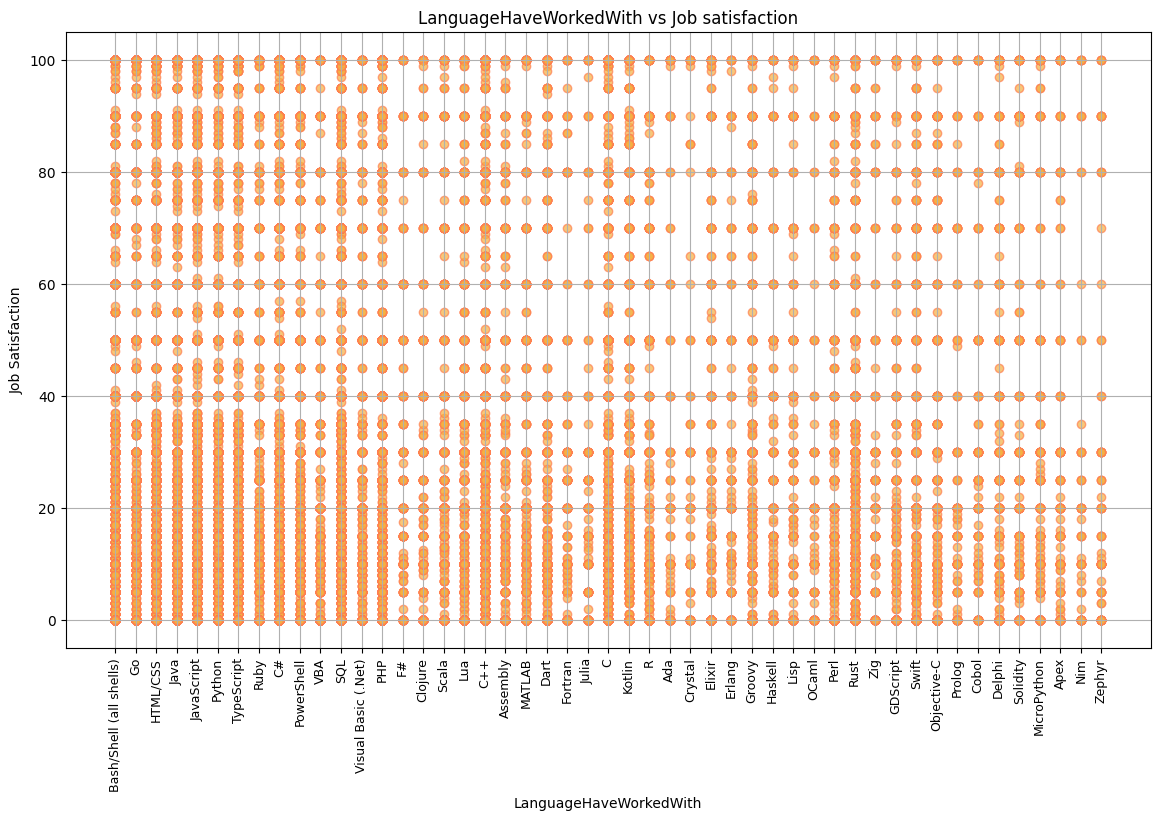

In [92]:
# Scatter plot
x=df_language_exploded['LanguageHaveWorkedWith'] 
y=df_language_exploded['JobSatPoints_6']
plt.figure(figsize=(14, 8))
plt.scatter(x,y, alpha=0.7, color='#f5b041', edgecolors='coral')

plt.title('LanguageHaveWorkedWith vs Job satisfaction')
plt.xlabel('LanguageHaveWorkedWith')
plt.ylabel('Job Satisfaction')
plt.xticks(fontsize=9, rotation=90)
plt.grid()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [93]:
#select data
df_employment = df[['ConvertedCompYearly','JobSatPoints_6','Employment','ResponseId']]

In [94]:
df_employment.shape

(65437, 4)

In [95]:
#Simplfy Employment categories
# Fucntion to simplify and attribute a status
def simplify_employment(status):
    if pd.isna(status):  
        return 'Unknown'
    elif 'full-time' in status and 'Employed' in status:
        return 'Employed full-time'
    elif 'part-time' in status and 'Employed' in status:
        return 'Employed part-time'
    elif 'Student' in status:
        return 'Student'
    elif 'freelancer' in status or 'Independent contractor' in status or 'self-employed' in status:
        return 'Freelancer'
    elif 'Not employed' in status:
        return 'Unemployed'
    else:
        return 'Other'

# Appy the function
df_employment['Employment_status'] = df_employment['Employment'].apply(simplify_employment)

# Check the results
print(df_employment[['Employment', 'Employment_status']].head())

            Employment   Employment_status
0  Employed, full-time  Employed full-time
1  Employed, full-time  Employed full-time
2  Employed, full-time  Employed full-time
3   Student, full-time             Student
4   Student, full-time             Student


/tmp/ipykernel_1713/1359386539.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employment['Employment_status'] = df_employment['Employment'].apply(simplify_employment)


In [96]:
(df_employment.isnull().sum())

ConvertedCompYearly    42002
JobSatPoints_6         35987
Employment                 0
ResponseId                 0
Employment_status          0
dtype: int64

In [97]:
#remove NaN
df_employment = df_employment.dropna(subset=['ConvertedCompYearly','JobSatPoints_6']) 
(df_employment.isnull().sum())

ConvertedCompYearly    0
JobSatPoints_6         0
Employment             0
ResponseId             0
Employment_status      0
dtype: int64

In [98]:
#filter data ConvertedCompYearly for outliers
df_employment_filtered = df_employment[df_employment['ConvertedCompYearly']<higher_outlier]

In [99]:
df_employment_filtered['Employment_status'].unique()

array(['Employed full-time', 'Freelancer', 'Employed part-time',
       'Unemployed', 'Student'], dtype=object)

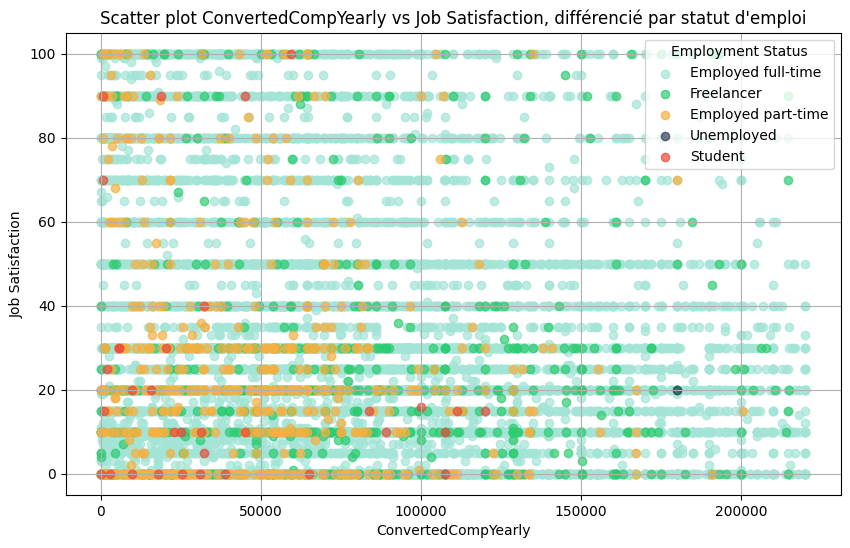

In [105]:
# Assign a color for each employment_status
colors = {'Employed full-time': '#a3e4d7', 'Employed part-time': '#f5b041', 
          'Freelancer':'#2ecc71','Unemployed': '#2e4053','Student':'#e74c3c'}

# Scatter plot with different colors and markers
plt.figure(figsize=(10, 6))
for status in df_employment_filtered['Employment_status'].unique():
    subset = df_employment_filtered[df_employment_filtered['Employment_status'] == status]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        label=status,
        color=colors[status],
        alpha=0.7
    )

plt.title('Scatter plot ConvertedCompYearly vs Job Satisfaction, différencié par statut d\'emploi')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction')
plt.legend(title='Employment Status')
plt.grid(True)

plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [106]:
#select data
df_country = df[['YearsCodePro','Age','Country','ResponseId']]

In [107]:
#check for NaN
(df_country.isnull().sum())

YearsCodePro    13827
Age                 0
Country          6507
ResponseId          0
dtype: int64

In [108]:
#remove NaN
df_country=df_country.dropna(subset=['YearsCodePro','Country'])

In [109]:
(df_country.isnull().sum())

YearsCodePro    0
Age             0
Country         0
ResponseId      0
dtype: int64

In [110]:
df_country.shape

(50394, 4)

In [111]:
#filter for Top 10 country
# Count occurrence of each country and select top 10
top_countries = df_country['Country'].value_counts().head(10).index

# create a df for top 10 countries
df_country_filtered = df_country[df_country['Country'].isin(top_countries)]

In [112]:
#check for unique entry for Age
df_country_filtered['Age'].unique()

array(['35-44 years old', '45-54 years old', '18-24 years old',
       '25-34 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [113]:
#check for top 10 countries
df_country_filtered['Country'].unique()

array(['United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Poland', 'India', 'Germany',
       'Ukraine', 'Brazil', 'France', 'Netherlands', 'Canada'],
      dtype=object)

In [114]:
#replace 'United Kingdom of Great Britain and Northern Ireland' by 'United Kingdom'
df_country_filtered['Country']=df_country_filtered['Country'].replace(to_replace='United Kingdom of Great Britain and Northern Ireland', 
                                                                    value='United Kingdom')


/tmp/ipykernel_1713/3904995499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_filtered['Country']=df_country_filtered['Country'].replace(to_replace='United Kingdom of Great Britain and Northern Ireland',


In [116]:
#standardize YearsCodePro - change Less than 1 year for 1 
df_country_filtered['YearsCodePro']=df_country_filtered['YearsCodePro'].replace(to_replace='Less than 1 year',value=1)

/tmp/ipykernel_1713/3233848403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_filtered['YearsCodePro']=df_country_filtered['YearsCodePro'].replace(to_replace='Less than 1 year',value=1)


In [117]:
#standardize YearsCodePro - change More than 50 years for 51 
df_country_filtered['YearsCodePro']=df_country_filtered['YearsCodePro'].replace(to_replace='More than 50 years',value=51)

/tmp/ipykernel_1713/1563459741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_filtered['YearsCodePro']=df_country_filtered['YearsCodePro'].replace(to_replace='More than 50 years',value=51)


In [119]:
df_country_filtered.head()

,YearsCodePro,Age,Country,ResponseId
1,17,35-44 years old,United Kingdom,2
2,27,45-54 years old,United Kingdom,3
6,7,35-44 years old,United States of America,7
11,25,45-54 years old,Poland,12
12,12,35-44 years old,United States of America,13


In [126]:
df_country_filtered['YearsCodePro'].dtype

dtype('O')

In [127]:
#convert YearsCodePro into numercial data type
df_country_filtered['YearsCodePro'] = pd.to_numeric(df_country_filtered['YearsCodePro'], errors='coerce')

/tmp/ipykernel_1713/3152184510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_filtered['YearsCodePro'] = pd.to_numeric(df_country_filtered['YearsCodePro'], errors='coerce')


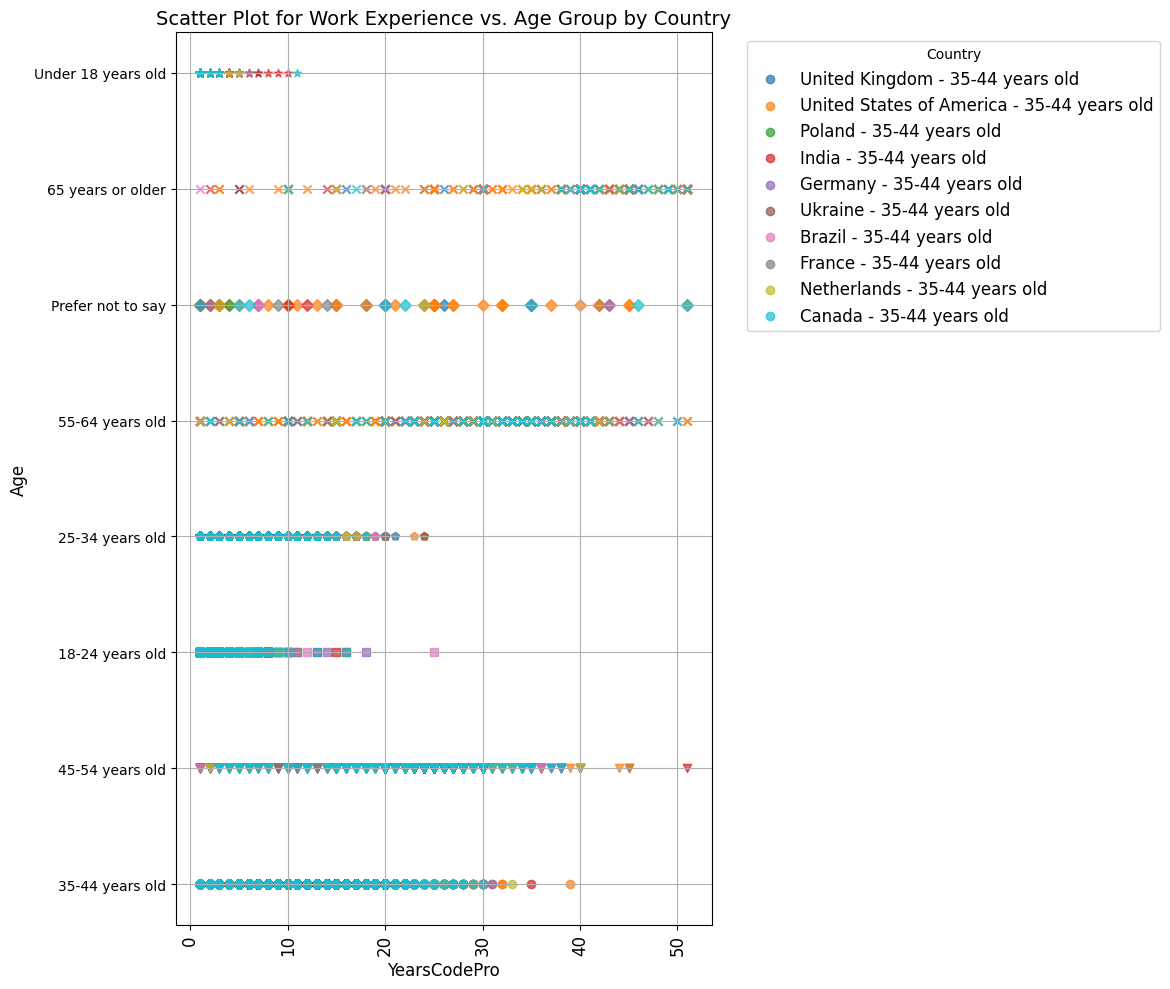

In [137]:
import matplotlib.colors as mcolors

# List top 10 country
countries = ['United Kingdom',
       'United States of America', 'Poland', 'India', 'Germany',
       'Ukraine', 'Brazil', 'France', 'Netherlands', 'Canada']

#generate a colormap with normalization
colormap = plt.cm.tab20  # Palette tab20 for distinct colors
# Normalization for country scale
norm = mcolors.Normalize(vmin=0, vmax=len(countries)) 

colors = {country: colormap(norm(i)) for i, country in enumerate(countries)}

#Generate distincts markers for Age
mark = {'35-44 years old': 'o', '45-54 years old': 'v', '18-24 years old': 's',
        '25-34 years old': 'p', '55-64 years old': 'x', 'Prefer not to say': 'D',
        '65 years or older': 'x', 'Under 18 years old': '*'}

# plot scatter plt
plt.figure(figsize=(12, 10))

for country in countries:
    for age_group, marker in mark.items():
        # Filtre les données
        subset = df_country_filtered[(df_country_filtered['Country'] == country) &
                                      (df_country_filtered['Age'] == age_group)]
        
        # Vérifie si le subset est vide
        if subset.empty:
            continue
        
        # Plot uniquement si des données sont présentes
        plt.scatter(subset['YearsCodePro'], subset['Age'],
                    label=f"{country} - {age_group}" if age_group == '35-44 years old' else None,
                    color=colors[country],
                    marker=marker,
                    alpha=0.7)

# Ajout du titre, des labels et de la légende
plt.title('Scatter Plot for Work Experience vs. Age Group by Country', fontsize=14)
plt.xlabel('YearsCodePro', fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
